**Student performance Classifier with KNN**

1.Import Libraries

In [68]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

2.Create Dataset

In [69]:
data = {
    "Study_Hours": [1,2,3,4,5,6,7,8,9,10],
    "Attendance": [50,55,60,65,70,75,80,85,90,95],
    "Previous_Score": [35,40,45,50,55,60,65,70,75,80],
    "Pass": [0,0,0,0,0,1,1,1,1,1]
}

df = pd.DataFrame(data)

x = df.drop("Pass",axis=1)
y = df["Pass"]


3.Train_Test_Split

In [70]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=42)

4.Scaler model

In [71]:
scaler = StandardScaler()
x_train_scaler=scaler.fit_transform(x_train)
x_test_scaler=scaler.transform(x_test)

5.Model KNN

In [72]:
k_values = []
accuracies = []
for k in range(1,8):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train_scaler,y_train)
    #Pediction
    y_pred = model.predict(x_test_scaler)
    print("Prediction:",y_pred)
    #Evaluation
    acc = accuracy_score(y_test,y_pred)
    cm = confusion_matrix(y_test,y_pred)
    k_values.append(k)
    accuracies.append(acc)
    print(f"K={k}, Accuracy Score:{acc}, Confusion Matrix: {cm}")

Prediction: [1 0]
K=1, Accuracy Score:1.0, Confusion Matrix: [[1 0]
 [0 1]]
Prediction: [1 0]
K=2, Accuracy Score:1.0, Confusion Matrix: [[1 0]
 [0 1]]
Prediction: [1 0]
K=3, Accuracy Score:1.0, Confusion Matrix: [[1 0]
 [0 1]]
Prediction: [1 0]
K=4, Accuracy Score:1.0, Confusion Matrix: [[1 0]
 [0 1]]
Prediction: [1 0]
K=5, Accuracy Score:1.0, Confusion Matrix: [[1 0]
 [0 1]]
Prediction: [1 0]
K=6, Accuracy Score:1.0, Confusion Matrix: [[1 0]
 [0 1]]
Prediction: [1 0]
K=7, Accuracy Score:1.0, Confusion Matrix: [[1 0]
 [0 1]]


6.Predict New Student

In [73]:
new_student = pd.DataFrame({"Study_Hours" : [6],
                            "Attendance" : [78],
                            "Previous_Score" : [62]})
new_student_scaler = scaler.fit_transform(new_student)
prediction = model.predict(new_student_scaler)
print("Prediction (0=Fail,1=Pass):",prediction)

Prediction (0=Fail,1=Pass): [1]


**Visualization for Student Performance Classifier(KNN)**

1.Feature distribution 

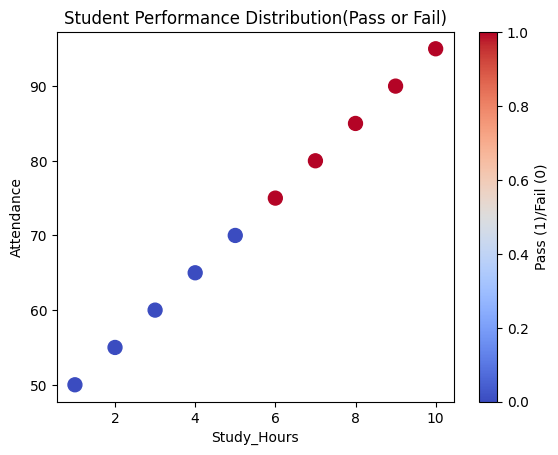

In [74]:
plt.scatter(df["Study_Hours"],df["Attendance"],c=df["Pass"],cmap="coolwarm",s=100)
plt.xlabel("Study_Hours")
plt.ylabel("Attendance")
plt.title("Student Performance Distribution(Pass or Fail)")
plt.colorbar(label="Pass (1)/Fail (0)")
plt.show()

2.Decision Boundary Visualization

In [94]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

x_vis = df[["Study_Hours", "Attendance"]]
y_vis = df["Pass"]

x_train_v, x_test_v, y_train_v, y_test_v = train_test_split(
    x_vis, y_vis, test_size=0.2, random_state=42
)

scaler_v = StandardScaler()
x_train_v = scaler_v.fit_transform(x_train_v)
x_test_v = scaler_v.transform(x_test_v)

for k in range(1, 8):
    knn_v = KNeighborsClassifier(n_neighbors=k)
    knn_v.fit(x_train_v, y_train_v)

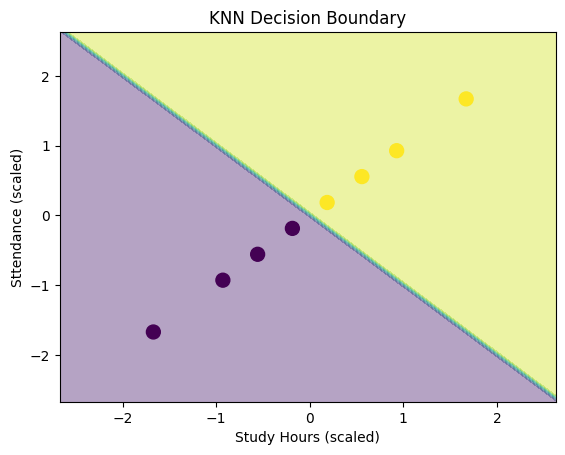

In [98]:
import numpy as np
x_min,x_max = x_train_v[:,0].min()-1,x_train_v[:,0].max()+1
y_min,y_max = x_train_v[:,1].min()-1,x_train_v[:,1].max()+1

xx, yy = np.meshgrid(np.arange(x_min,x_max,0.1),np.arange(y_min,y_max,0.1))
z = knn_v.predict(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)
#Plot decision boundary
plt.contourf(xx,yy,z,alpha=0.4)
plt.scatter(x_train_v[:,0],x_train_v[:,1],c=y_train_v,s=100)
plt.xlabel("Study Hours (scaled)")
plt.ylabel("Sttendance (scaled)")
plt.title("KNN Decision Boundary")
plt.show()

3.Confusion Matrix Visualization

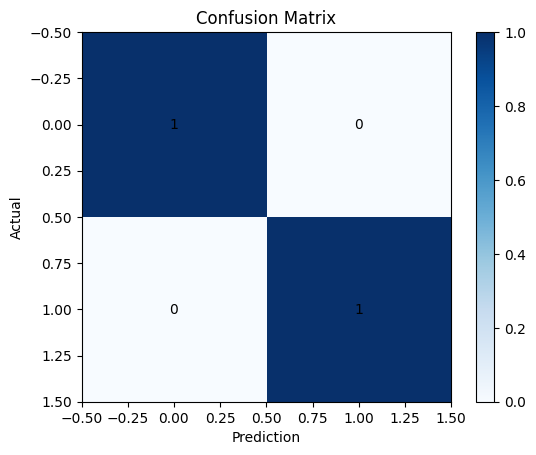

In [104]:
plt.imshow(cm,cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Prediction")
plt.ylabel("Actual")

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j,i,cm[i,j],
                 ha="center",va="center")

plt.colorbar()
plt.show()